## import base input targetlist

In [3]:
# inputs

tier = "Tier2"

# targetlist fname
targetlist_fname = [
    "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/20250520_ArielTargetSimul_Metadata.csv"
]

# Retrieval folder
retrieval_folder = [f"/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/retrievals/{tier}/"]

# forwards folder
forwards_folder = [
    f"/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/forwards/ArielInstrument{tier}"
]

# models

comp_folders = ["/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/20250520_ArielTargetProfileData"]

pt_folders = ["/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/20250520_ArielTargetProfileData"]

# out tab
out_tab_fname = f'{tier}_v2_data_analyzed.csv'

# tier = "Tier2"

# # targetlist fname
# targetlist_fname = ['/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/20250322_ArielTargetSimul.csv',
#                     '/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 5/targetlist.csv']

# # Retrieval folder
# retrieval_folder = [f"/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 5/retrievals/{tier}/",
#                     f"/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/retrievals/{tier}/"]

# # forwards folder
# forwards_folder = [f"/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 5/forwards/ArielInstrument{tier}",
#                    f"/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/forwards/ArielInstrument{tier}"]

# # models

# comp_folders = ["/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 5/20250322_ArielTargetProfileData_ChangedPnames",
#                 "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/20250322_ArielTargetProfileData_ChangedPnames"]

# pt_folders = ["/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 5/20250322_ArielTargetProfileData_ChangedPnames",
#               "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/20250322_ArielTargetProfileData_ChangedPnames"]

# # out tab
# out_tab_fname = f'{tier}_v2_data_analyzed.csv'

In [4]:
import sys
import os

# Add the current notebook's directory to the Python path
sys.path.append(os.getcwd())

# Now import the function
from inspector import Inspector

# Create an instance of the Inspector class
inspector = Inspector(targetlist_fname)

print(len(inspector.targetlist))

loading table /home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/20250520_ArielTargetSimul_Metadata.csv
found 236 rows
Converting column Star V Mag to float64 from float64
Converting column Star Name to U128 from  <U10
Converting column Spectral Type to U128 from  <U1
Converting column Planet Name to U128 from  <U16
Converting column Best Method to U128 from  <U7
Converting column Chemistry filename to U128 from  <U67
Converting column Pressure-Temperature filename to U128 from  <U64
combined in 236 rows
236


## Load retrievals

In [5]:
inspector.load_retrievals(retrieval_folder)

Loading retrieval data from multiple folders...


 10%|▉         | 23/236 [00:00<00:08, 24.69it/s]

-> File not found: K2-138fFiduR
-> File not found: Kepler-109cFiduR


 11%|█▏        | 27/236 [00:01<00:07, 27.72it/s]

-> File not found: TOI-1136bFiduR


 20%|██        | 48/236 [00:01<00:05, 31.94it/s]

-> File not found: K2-138fFidu
-> File not found: Kepler-109cFidu


100%|██████████| 236/236 [00:09<00:00, 25.85it/s]


Found 231 valid planets


100%|██████████| 231/231 [00:01<00:00, 177.99it/s]


In [6]:
inspector.missing_planets()

missing_planets = inspector.create_missing_planets_table()
print(missing_planets.keys())
print(
    missing_planets[
        "Planet Name",
        "COratio",
        "OHratio",
        "HeHratio",
        "Migration Efficiency [Fiducial = 0, Efficient = 1]",
        "Redox [Reduced = 0, Oxidized = 1]",
        "Accreted Ice/Rock ratio",
        "RemainingAtm/InitialAtm",
        "InitialAtm/Rock",
    ]
)
from astropy.io import ascii

ascii.write(missing_planets, "missing_planets_ret.csv", format='csv', overwrite=True)

Missing planets: 5
[17, 19, 23, 43, 45]
  Planet Name   
----------------
    K2-138fFiduR
Kepler-109cFiduR
  TOI-1136bFiduR
     K2-138fFidu
 Kepler-109cFidu
['Star Name', 'Star Mass [Ms]', 'Spectral Type', 'Star Temperature [K]', 'Star Radius [Rs]', 'Star Distance [pc]', 'Star K Mag', 'Star V Mag', 'Star Metallicity', 'Star Age [Gyr]', 'Star RA', 'Star Dec', 'Planet Name', 'Planet Period [days]', 'Planet Temperature [K]', 'Planet Semi-major Axis [m]', 'Planet Radius [Re]', 'Planet Albedo', 'Planet Mass [Me]', 'Molecular Weight', 'Transit Duration [s]', 'Impact Parameter', 'Heat Redistribution Factor', 'Inclination', 'Eccentricity', 'Transit Mid Time', 'Tier', 'Best Method', 'Time [s]', 'Chemistry filename', 'Pressure-Temperature filename', 'COratio', 'OHratio', 'HeHratio', 'Migration Efficiency [Fiducial = 0, Efficient = 1]', 'Redox [Reduced = 0, Oxidized = 1]', 'Accreted Ice/Rock ratio', 'RemainingAtm/InitialAtm', 'InitialAtm/Rock']
  Planet Name      COratio   ... RemainingAtm/Init

## load Ariel's data

In [7]:
inspector.load_ariel_data(forwards_folder)

Loading Ariel data


100%|██████████| 231/231 [00:08<00:00, 27.18it/s]


## load profile data

In [8]:
inspector.load_profiles(comp_folders, pt_folders)

Loading composition and PT profiles...


100%|██████████| 231/231 [00:01<00:00, 228.45it/s]


## Compute metallicities

In [9]:
inspector.compute_elemental_ratios()
inspector.compute_profile_ratios()

computing elemental ratios


100%|██████████| 231/231 [00:00<00:00, 2508.62it/s]


computing profile ratios


100%|██████████| 231/231 [00:00<00:00, 3105.72it/s]


## saving data

In [10]:
inspector.save_table(out_tab_fname)

Table saved to Tier2_v2_data_analyzed.csv


In [11]:
#sorting the table

inspector.out_targetlist.sort(['Redox [Reduced = 0, Oxidized = 1]',"Migration Efficiency [Fiducial = 0, Efficient = 1]"])


# Let's do some plotting now

/tmp/ipykernel_316035/3653086776.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


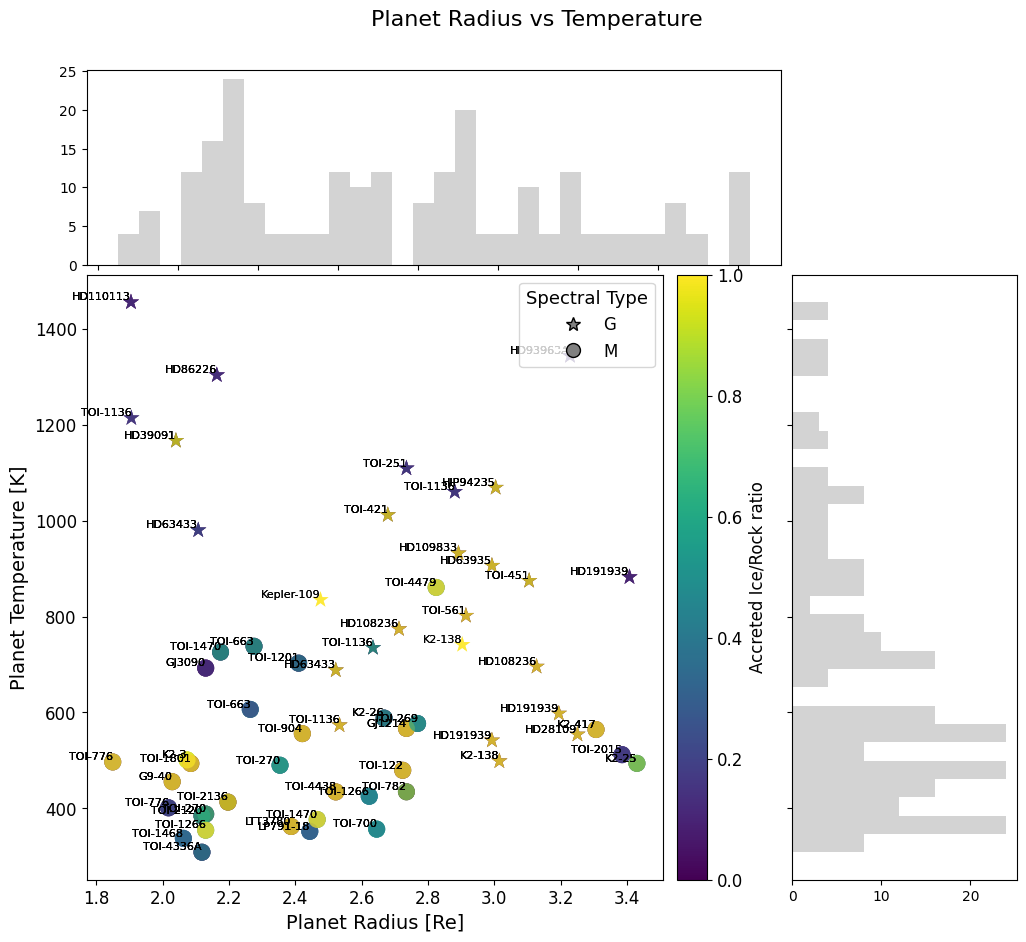

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Extract data from the inspector's output table
x = inspector.out_targetlist['Planet Radius [Re]']
y = inspector.out_targetlist['Planet Temperature [K]']
spectral = inspector.out_targetlist['Spectral Type']
ice_rock_ratio = inspector.out_targetlist['Accreted Ice/Rock ratio']

# Remove NaNs e stringhe vuote e garantire che la colonna ratio sia valida
mask = (~np.isnan(x)) & (~np.isnan(y)) & (spectral != '') & (~np.isnan(ice_rock_ratio))
x = x[mask]
y = y[mask]
spectral = spectral[mask]
ice_rock_ratio = ice_rock_ratio[mask]

# Define marker mapping based on spectral type
marker_map = {
    'M': 'o',  # circle for type M
    'G': '*',  # square for type G
}
# For spectral types not in marker_map, we assign a default marker (e.g. triangle)
# (Not strictly necessary se si hanno solo "M" e "G")
markers = np.array([marker_map[stype] if stype in marker_map else '^' for stype in spectral])

# Set up figure and grid layout
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(4, 4, hspace=0.05, wspace=0.05)

ax_main = fig.add_subplot(gs[1:, :-1])
ax_xhist = fig.add_subplot(gs[0, :-1], sharex=ax_main)
ax_yhist = fig.add_subplot(gs[1:, -1], sharey=ax_main)

# Define colormap for the "Accreted Ice/Rock ratio"
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=np.nanmin(ice_rock_ratio), vmax=np.nanmax(ice_rock_ratio))

# === Scatter plot ===
# Plot points per spectral type to differenciare le popolazioni tramite forma
unique_types = np.unique(spectral)
for stype in unique_types:
    group_mask = (spectral == stype)
    ax_main.scatter(x[group_mask], y[group_mask], 
                    c=ice_rock_ratio[group_mask], cmap=cmap, norm=norm,
                    marker=marker_map[stype] if stype in marker_map else '^', 
                    edgecolors='none', linewidths=0.5, alpha=0.7, label=stype, s=150)

ax_main.set_xlabel("Planet Radius [Re]", fontsize=14)
ax_main.set_ylabel("Planet Temperature [K]", fontsize=14)
ax_main.tick_params(axis='both', labelsize=12)


# Annotate planet names with a larger font size
star_names = inspector.out_targetlist['Star Name'][mask].astype(str)
for xi, yi, name in zip(x, y, star_names):
    ax_main.annotate(name, (xi, yi), fontsize=8, ha='right', va='bottom')

# === Top histogram ===
ax_xhist.hist(x, bins=30, color="lightgrey")
ax_xhist.tick_params(axis='x', labelbottom=False)
ax_xhist.tick_params(axis='y', labelsize=10)

# === Right histogram ===
ax_yhist.hist(y, bins=30, orientation="horizontal", color="lightgrey")
ax_yhist.tick_params(axis='y', labelleft=False)
ax_yhist.tick_params(axis='x', labelsize=10)

# === Legend based on spectral type (marker shape) ===
handles = [plt.Line2D([0], [0], marker=marker_map[t] if t in marker_map else '^', color='w', label=t,
                      markerfacecolor='gray', markersize=10, markeredgecolor='k')
           for t in unique_types]
ax_main.legend(handles=handles, title="Spectral Type", fontsize=12, title_fontsize=13, loc='upper right')

# === Add a colourbar based on the 'Accreted Ice/Rock ratio' ===
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax_main, pad=0.02)
cbar.set_label("Accreted Ice/Rock ratio", fontsize=12)

# === Title ===
fig.suptitle("Planet Radius vs Temperature", 
             fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

fig.savefig("plots/planet_radius_temp.pdf", dpi=600)


In [13]:
selections=[list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0))[0]),
                list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0))[0]),
                list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1))[0]),
                list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1))[0])]

print(selections)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114], [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171], [172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [14]:
# fig = inspector.plot_nobs(    selections=selections,
#     labels=["Fiducial reduced", "Efficient reduced", "Fiducial oxidized", "Efficient oxidized"],
#     colours=["#377eb8", "#e41a1c", "#4daf4a", "#ff7f00"],
#     threshold=150,
#     )

# fig.savefig(f"plots/nobs_{tier}.pdf", dpi=600)


In [15]:
# inspector.plot_obs_time(selection = np.where(inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0))

# fig = inspector.plot_obs_time(
#     selections=selections,
#     labels=["Fiducial reduced", "Efficient reduced", "Fiducial oxidized", "Efficient oxidized"],
#     colours=["#377eb8", "#e41a1c", "#4daf4a", "Purple"],
#     threshold=500,
#     all_combined=True,
#     title=f"Observation Time for {tier}",
# )
# fig.savefig(f"plots/obs_time_{tier}.pdf", dpi=600)


In [16]:
from copy import deepcopy

obs = deepcopy(inspector.out_targetlist["obs_time"].data)
obs.sort()
cum = np.cumsum(obs)
print(obs, cum)
idx = np.argmin(np.abs(cum - 1000))
print(idx)

[1.73932000e+00 5.12400000e+00 5.21796000e+00 1.07200000e+01
 1.21260000e+01 1.93300000e+01 2.05730000e+01 2.27110000e+01
 2.32400000e+01 2.35120000e+01 2.43390000e+01 2.65770000e+01
 2.92600000e+01 3.00000000e+01 3.27000000e+01 3.81800000e+01
 3.84300000e+01 4.11460000e+01 4.14500000e+01 4.16200000e+01
 4.28800000e+01 4.36800000e+01 4.42800000e+01 4.68800000e+01
 4.81248000e+01 4.87500000e+01 5.05250000e+01 5.41570000e+01
 5.55500000e+01 5.55900000e+01 5.58422222e+01 5.89260000e+01
 5.92800000e+01 5.93980000e+01 5.96880000e+01 6.00065400e+01
 6.08762000e+01 6.15000000e+01 6.20770000e+01 6.55200000e+01
 6.68704000e+01 7.05360000e+01 7.38000000e+01 7.74900000e+01
 7.97310000e+01 8.07300000e+01 8.15100000e+01 8.19200000e+01
 8.32400000e+01 9.04800000e+01 9.29880000e+01 9.44650000e+01
 9.54800000e+01 9.68000000e+01 9.88100000e+01 9.95790000e+01
 1.00325000e+02 1.02920000e+02 1.04485000e+02 1.05480000e+02
 1.06560000e+02 1.06800000e+02 1.08410000e+02 1.09500000e+02
 1.11180000e+02 1.151970

## validate retrieval

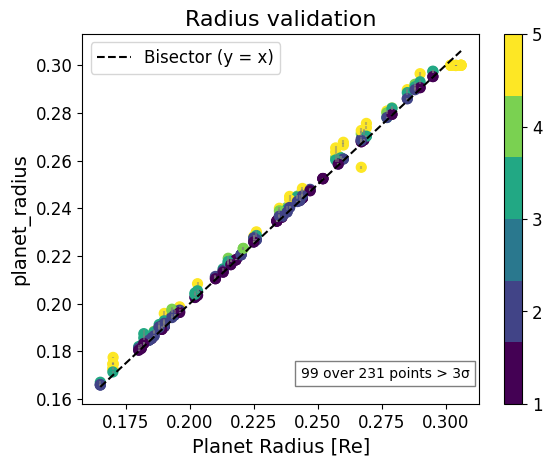

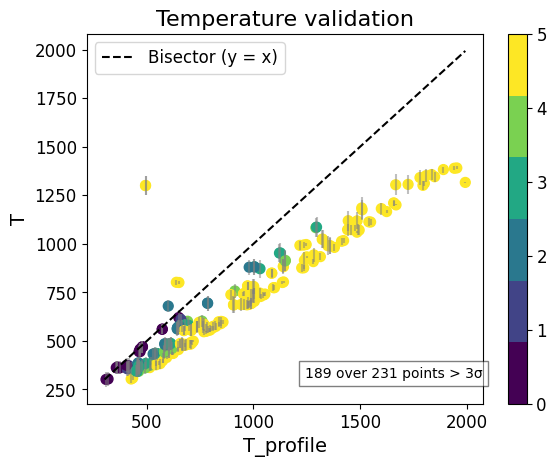

In [17]:
import astropy.units as u
inspector.plot_comparison('Planet Radius [Re]', 'planet_radius', 'planet_radius_sigma_p', 'planet_radius_sigma_m', title="Radius validation", conversion_factor=u.R_earth.to(u.R_jup))

inspector.plot_comparison('T_profile', 'T', 'T_sigma_p', 'T_sigma_m', title="Temperature validation")

[False False False  True False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False  True False False  True  True False]


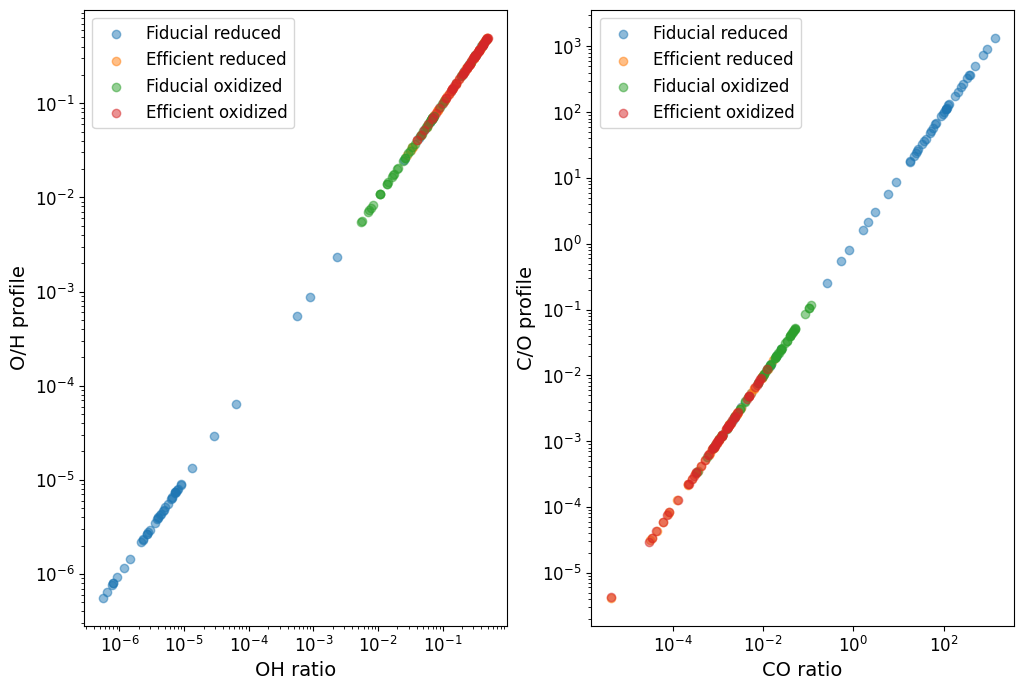

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

for sel, label in zip(selections, ["Fiducial reduced", "Efficient reduced", "Fiducial oxidized", "Efficient oxidized"]):

    axs[0].scatter(inspector.out_targetlist['OHratio'][sel], inspector.out_targetlist['O/H_profile'][sel], label=label, alpha=0.5)
    axs[1].scatter(inspector.out_targetlist['COratio'][sel], inspector.out_targetlist['C/O_profile'][sel], label=label, alpha=0.5)

axs[0].set_xlabel("OH ratio")
axs[0].set_ylabel("O/H profile")
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend()

axs[1].set_xlabel("CO ratio")
axs[1].set_ylabel("C/O profile")
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].legend()


idx = inspector.out_targetlist['O/H_profile'][selections[2]] < 1e-2
print(idx)
# inspector.out_targetlist['Planet Name', "Chemistry filename"][selections[2]][idx]

/tmp/ipykernel_316035/4093130487.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_, H_profile.value, cmap='viridis', s=30, facecolors="none", edgecolors='k', marker="s", alpha=0.5, zorder=2)


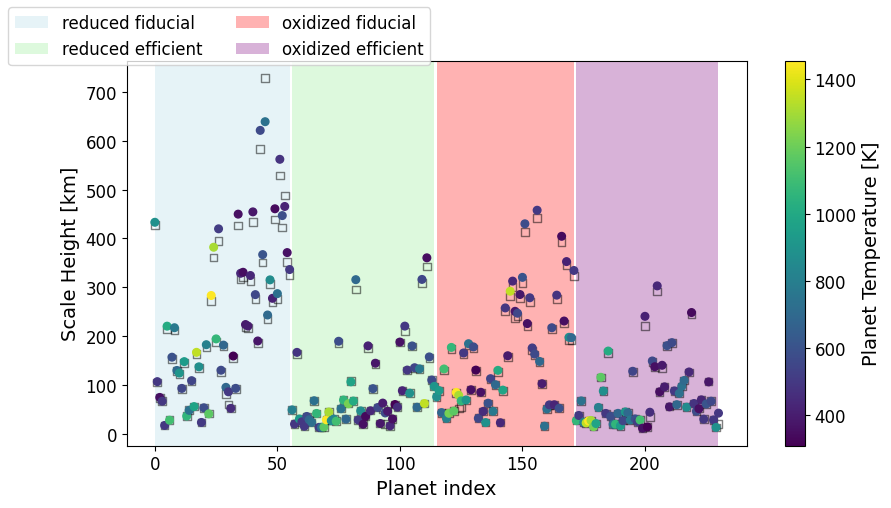

In [19]:
import astropy.units as u

H = inspector.calculate_scale_height(abundances_dict={"CH4":inspector.out_targetlist["log_CH4"],
                                                                "H2O":inspector.out_targetlist["log_H2O"],
                                                                "CO":inspector.out_targetlist["log_CO"],
                                                                "CO2":inspector.out_targetlist["log_CO2"],},
                                            # T_list=inspector.out_targetlist["Planet Temperature [K]"]*u.K,
                                            #  M_list=inspector.out_targetlist["Planet Mass [Me]"]*u.M_earth.to(u.kg)*u.kg,
                                            #  R_list=inspector.out_targetlist["Planet Radius [Re]"]*u.R_earth.to(u.m)*u.m,
                                             T_list=inspector.out_targetlist["T"]*u.K,
                                             M_list=inspector.out_targetlist["Planet Mass [Me]"]*u.M_earth.to(u.kg)*u.kg,
                                             R_list=inspector.out_targetlist["planet_radius"]*u.R_jup.to(u.m)*u.m,
                                             abundance_scale="log")

H = inspector.calculate_scale_height(abundances_dict={"CH4":inspector.out_targetlist["log_CH4"],
                                                                "H2O":inspector.out_targetlist["log_H2O"],
                                                                "CO":inspector.out_targetlist["log_CO"],
                                                                "CO2":inspector.out_targetlist["log_CO2"],},
                                            # T_list=inspector.out_targetlist["Planet Temperature [K]"]*u.K,
                                            #  M_list=inspector.out_targetlist["Planet Mass [Me]"]*u.M_earth.to(u.kg)*u.kg,
                                            #  R_list=inspector.out_targetlist["Planet Radius [Re]"]*u.R_earth.to(u.m)*u.m,
                                             T_list=inspector.out_targetlist["T"]*u.K,
                                             M_list=inspector.out_targetlist["Planet Mass [Me]"]*u.M_earth.to(u.kg)*u.kg,
                                             R_list=inspector.out_targetlist["planet_radius"]*u.R_jup.to(u.m)*u.m,
                                             abundance_scale="log")

# print(H)


H_profile = inspector.calculate_scale_height(abundances_dict={"CH4":inspector.out_targetlist["CH4_profile"],
                                                                "H2O":inspector.out_targetlist["H2O_profile"],
                                                                "CO":inspector.out_targetlist["CO_profile"],
                                                                "CO2":inspector.out_targetlist["CO2_profile"],},
                                             T_list=inspector.out_targetlist["Planet Temperature [K]"]*u.K,
                                             M_list=inspector.out_targetlist["Planet Mass [Me]"]*u.M_earth.to(u.kg)*u.kg,
                                             R_list=inspector.out_targetlist["Planet Radius [Re]"]*u.R_earth.to(u.m)*u.m,
                                             abundance_scale="linear")

# print(H_profile)

inspector.out_targetlist.sort(['Redox [Reduced = 0, Oxidized = 1]',"Migration Efficiency [Fiducial = 0, Efficient = 1]"])

selections=[list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0))[0]),
            list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0))[0]),
            list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1))[0]),
            list(np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1))[0])]

# print(selections)

# Combine all selections into a single list of indices
all_selections = np.concatenate(selections)

# Create a boolean mask
mask = np.isin(np.arange(len(inspector.out_targetlist)), all_selections)

# Now, use boolean indexing to select the rows
new_table = inspector.out_targetlist[mask]
H = H[mask]
H_profile = H_profile[mask]

selections=[list(np.where((new_table["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (new_table["Redox [Reduced = 0, Oxidized = 1]"]==0))[0]),
            list(np.where((new_table["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (new_table["Redox [Reduced = 0, Oxidized = 1]"]==0))[0]),
            list(np.where((new_table["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (new_table["Redox [Reduced = 0, Oxidized = 1]"]==1))[0]),
            list(np.where((new_table["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (new_table["Redox [Reduced = 0, Oxidized = 1]"]==1))[0])]

# print(selections)


fig, ax = plt.subplots(1, 1, figsize=(10, 5))

x_ = np.arange(len(inspector.out_targetlist))

background_regions = [
    {"start": selections[0][0], "end": selections[0][-1], "color": "lightblue", "alpha": 0.3, "label": "reduced fiducial"},
    {"start": selections[1][0], "end": selections[1][-1], "color": "lightgreen", "alpha": 0.3, "label": "reduced efficient"},
    {"start": selections[2][0], "end": selections[2][-1], "color": "red", "alpha": 0.3, "label": "oxidized fiducial"},
    {"start": selections[3][0], "end": selections[3][-1], "color": "purple", "alpha": 0.3, "label": "oxidized efficient"},
]


# If background regions are specified, add a coloured band for each region
if background_regions is not None:
    for reg in background_regions:
        # Draw background coloured section over the specified x-range
        ax.axvspan(reg['start'], reg['end'], facecolor=reg.get('color', 'lightgrey'),
                alpha=reg.get('alpha', 0.3), zorder=0)

from matplotlib.patches import Patch
region_handles = []
for reg in background_regions:
    handle = Patch(facecolor=reg.get('color', 'lightgrey'),
                alpha=reg.get('alpha', 0.3),
                label=reg.get('label', f"{reg['start']}-{reg['end']}"))
    region_handles.append(handle)
                
scatter = ax.scatter(x_, H.value, c=new_table["Planet Temperature [K]"], cmap='viridis', s=30, zorder=3,)
ax.scatter(x_, H_profile.value, cmap='viridis', s=30, facecolors="none", edgecolors='k', marker="s", alpha=0.5, zorder=2)

plt.colorbar(scatter, ax=ax, label='Planet Temperature [K]')

ax.set_ylabel("Scale Height [km]", fontsize=14)
ax.set_xlabel("Planet index", fontsize=14)
fig.legend(handles=region_handles, loc='upper left', ncol=2)

fig.savefig(f"plots/scale_H_{tier}.pdf", dpi=600)


## notes
- under estimation of temperature might be expected. 
- No cstrong correlation with failing water fit

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114], [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171], [172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:954: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit the colourbar


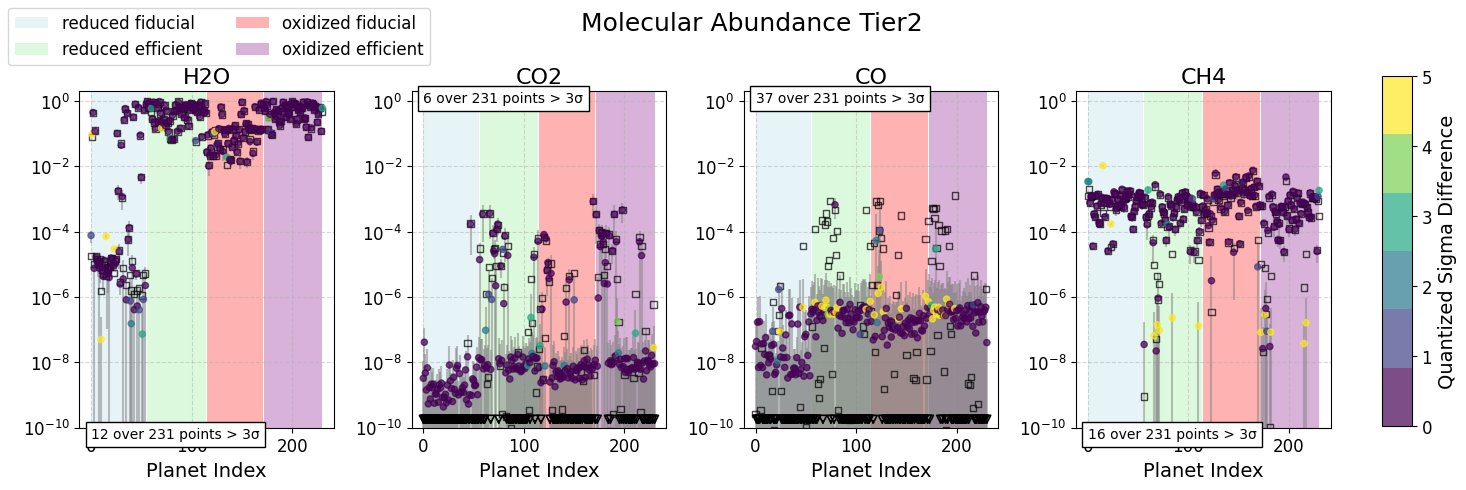

/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:954: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit the colourbar


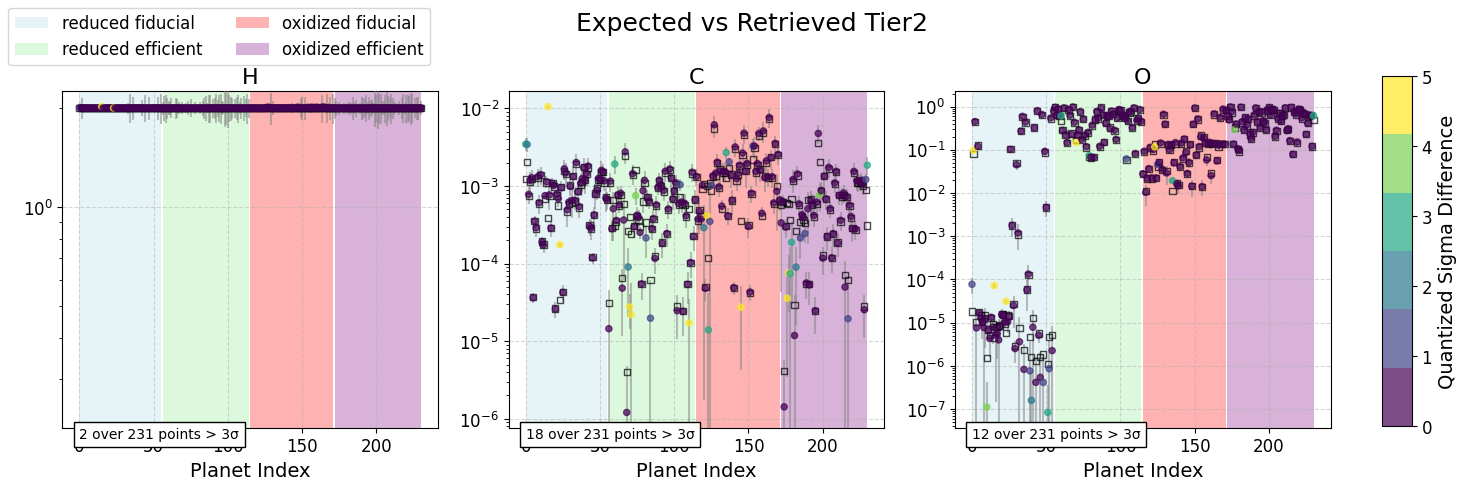

/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:954: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit the colourbar


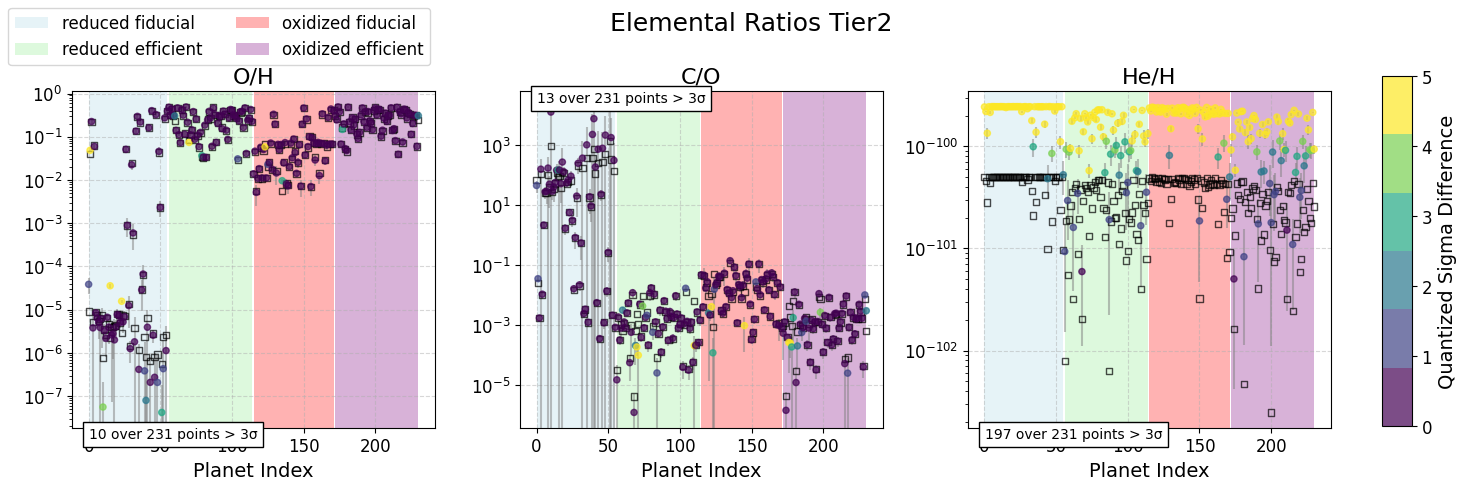

In [20]:
# Example of the background_regions parameter
print(selections)

background_regions = [
    {"start": selections[0][0], "end": selections[0][-1], "color": "lightblue", "alpha": 0.3, "label": "reduced fiducial"},
    {"start": selections[1][0], "end": selections[1][-1], "color": "lightgreen", "alpha": 0.3, "label": "reduced efficient"},
    {"start": selections[2][0], "end": selections[2][-1], "color": "red", "alpha": 0.3, "label": "oxidized fiducial"},
    {"start": selections[3][0], "end": selections[3][-1], "color": "purple", "alpha": 0.3, "label": "oxidized efficient"},
]

fig = inspector.plot_comparison_panels(keys=["H2O", "CO2", "CO", "CH4"], title=f"Molecular Abundance {tier}", alpha=0.7, background_regions=background_regions, ylim=(10**-10, 2))
fig.savefig(f"plots/molecular_abundance_{tier}.pdf", dpi=600)

fig = inspector.plot_comparison_panels(keys=["H", "C", "O"], title=f"Expected vs Retrieved {tier}", alpha=0.7, background_regions=background_regions)
fig.savefig(f"plots/expected_vs_retrieved_{tier}.pdf", dpi=600)

fig = inspector.plot_comparison_panels(keys=["O/H", "C/O", "He/H"], title=f"Elemental Ratios {tier}", alpha=0.7, background_regions=background_regions)
fig.savefig(f"plots/abundance_ratios_{tier}.pdf", dpi=600)

['Star Name', 'Star Mass [Ms]', 'Spectral Type', 'Star Temperature [K]', 'Star Radius [Rs]', 'Star Distance [pc]', 'Star K Mag', 'Star V Mag', 'Star Metallicity', 'Star Age [Gyr]', 'Star RA', 'Star Dec', 'Planet Name', 'Planet Period [days]', 'Planet Temperature [K]', 'Planet Semi-major Axis [m]', 'Planet Radius [Re]', 'Planet Albedo', 'Planet Mass [Me]', 'Molecular Weight', 'Transit Duration [s]', 'Impact Parameter', 'Heat Redistribution Factor', 'Inclination', 'Eccentricity', 'Transit Mid Time', 'Tier', 'Best Method', 'Time [s]', 'Chemistry filename', 'Pressure-Temperature filename', 'COratio', 'OHratio', 'HeHratio', 'Migration Efficiency [Fiducial = 0, Efficient = 1]', 'Redox [Reduced = 0, Oxidized = 1]', 'Accreted Ice/Rock ratio', 'RemainingAtm/InitialAtm', 'InitialAtm/Rock', 'H2/He', 'T', 'T_sigma_p', 'T_sigma_m', 'log_CH4', 'log_CH4_sigma_p', 'log_CH4_sigma_m', 'log_CO', 'log_CO_sigma_p', 'log_CO_sigma_m', 'log_CO2', 'log_CO2_sigma_p', 'log_CO2_sigma_m', 'log_H2O', 'log_H2O_sigma

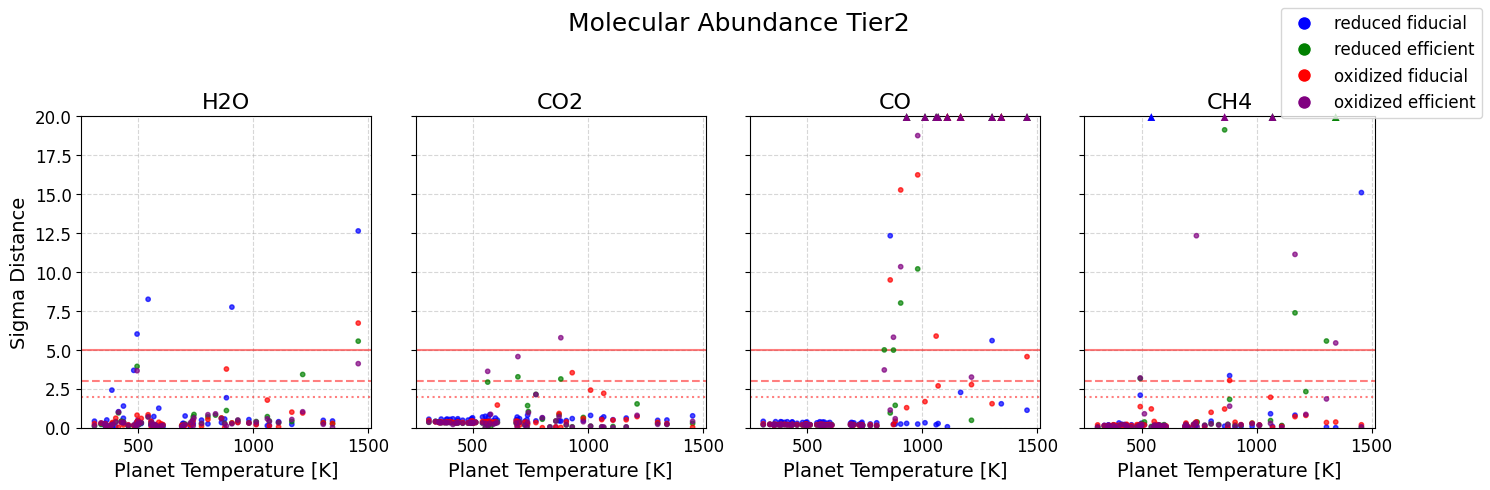

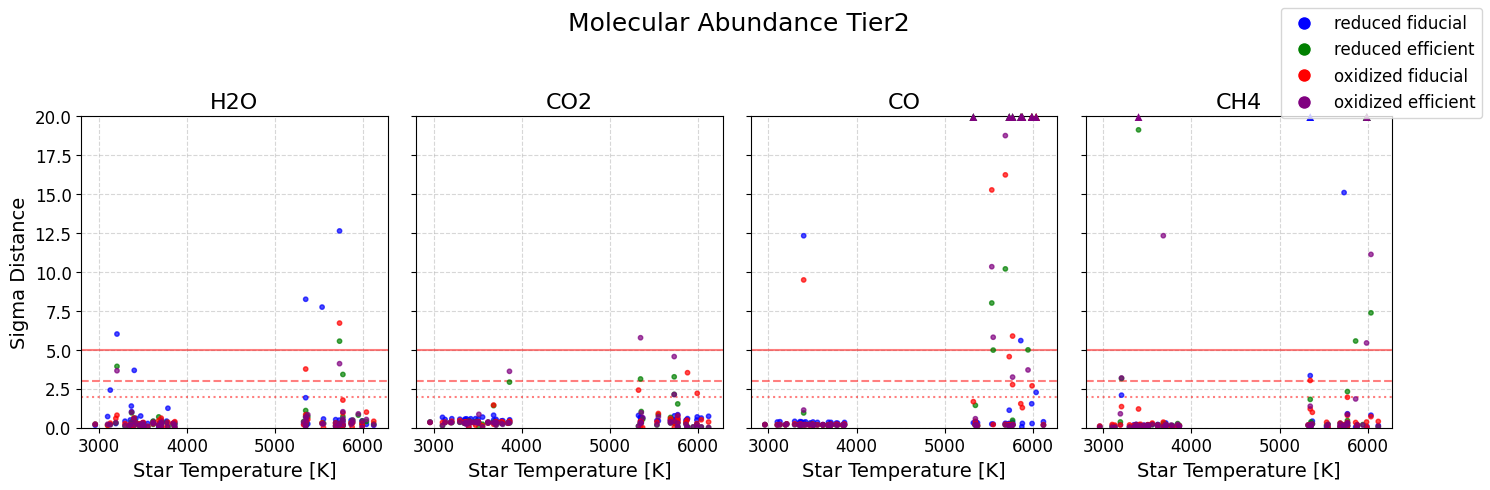

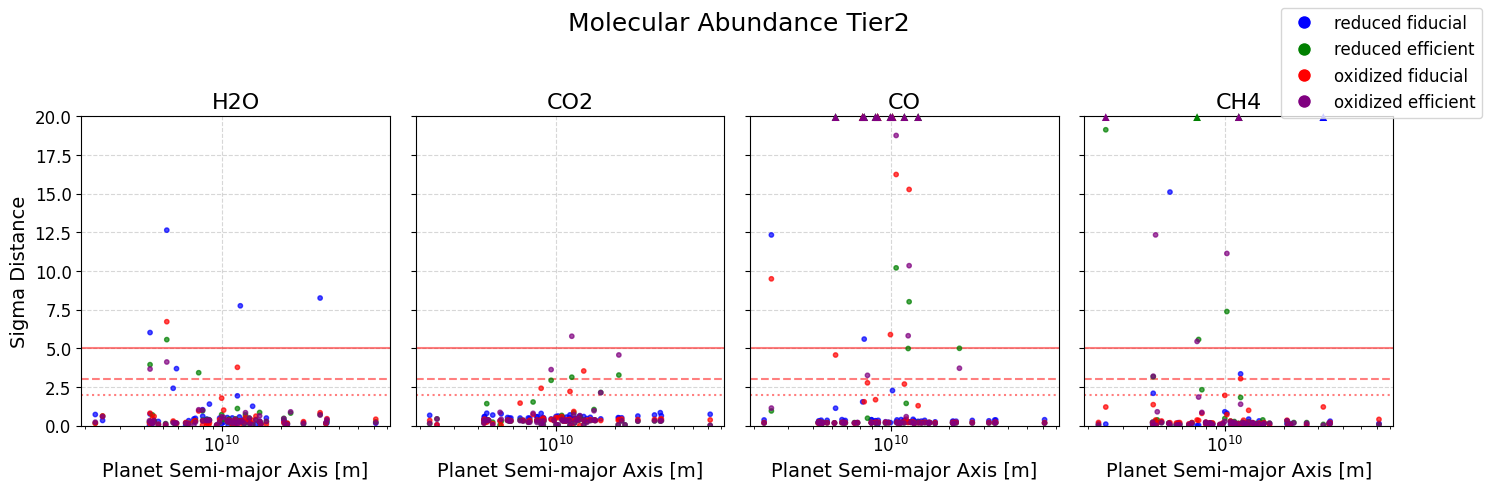

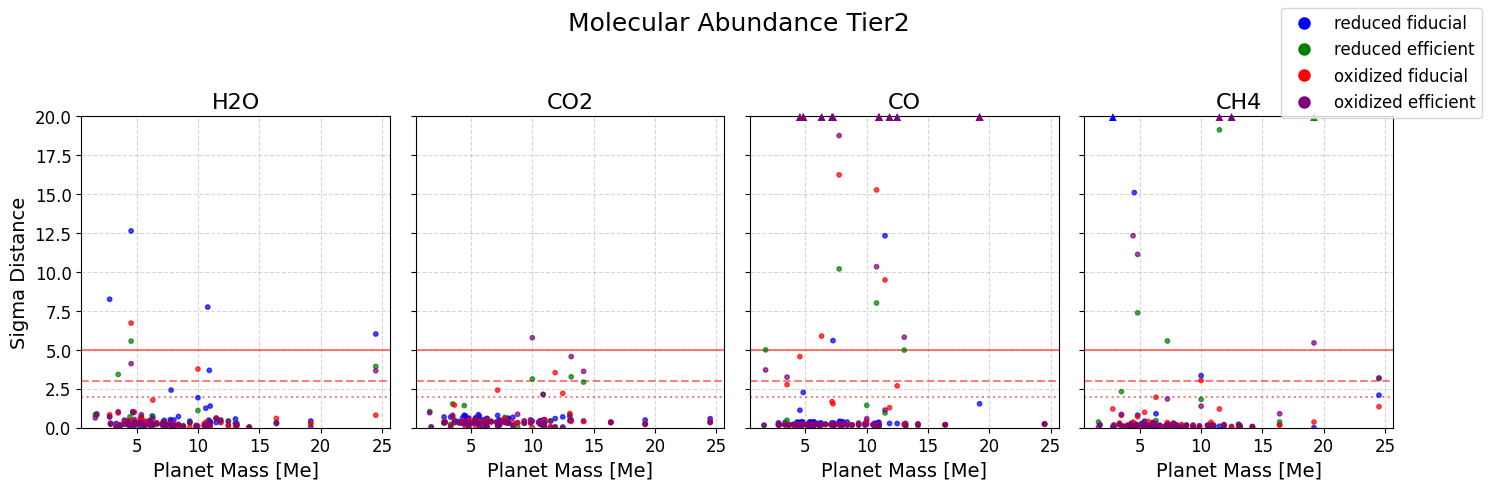

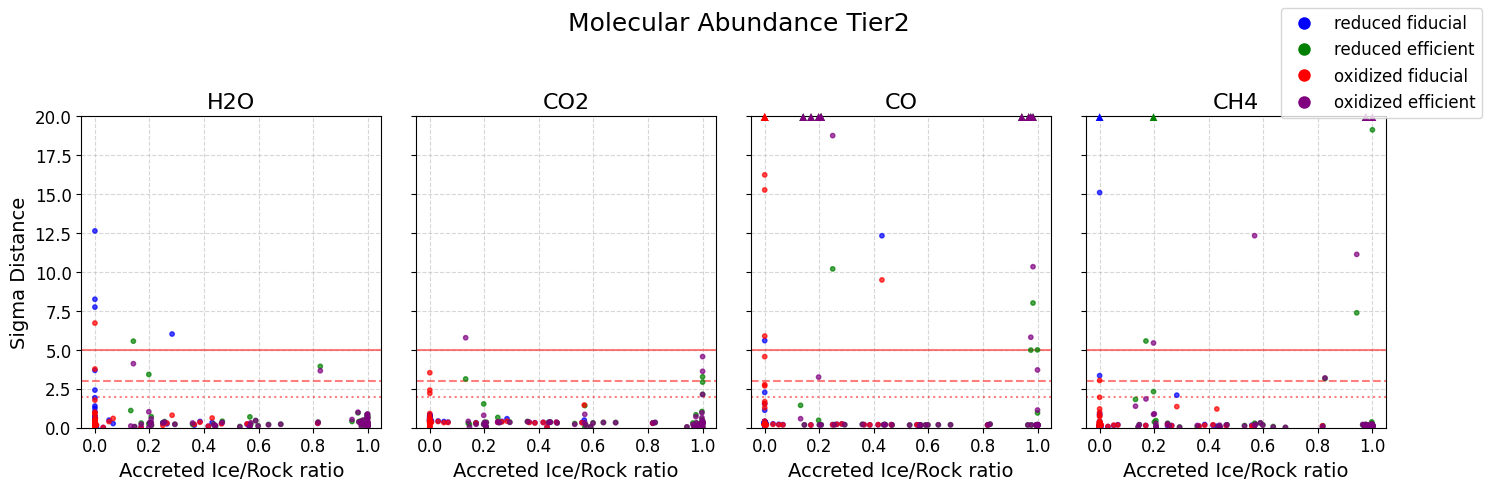

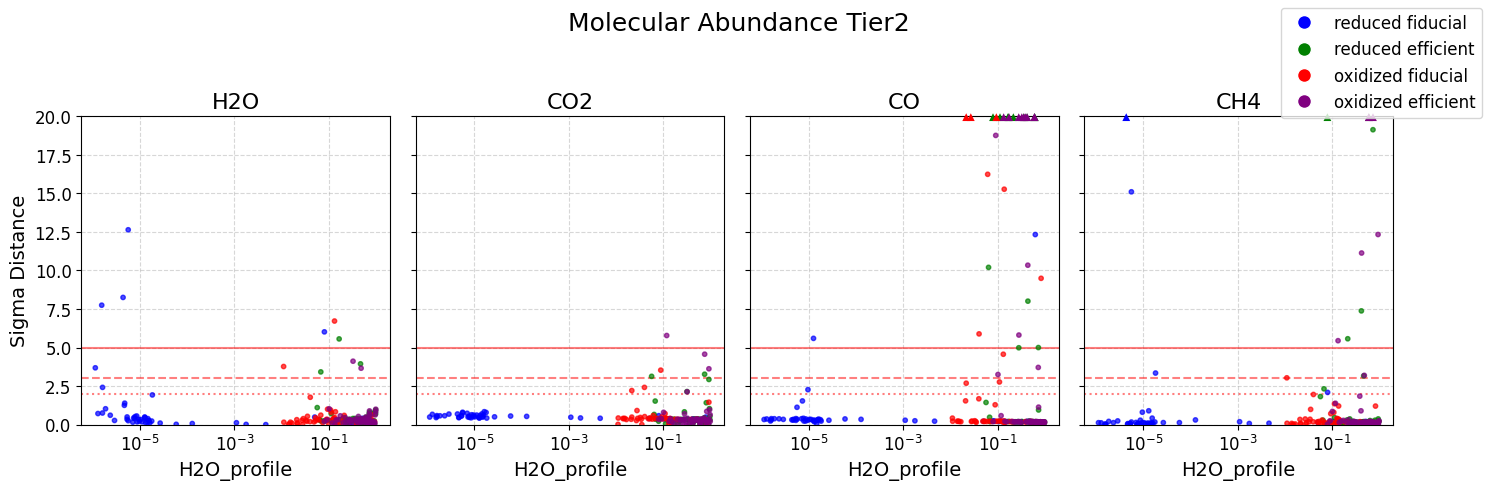

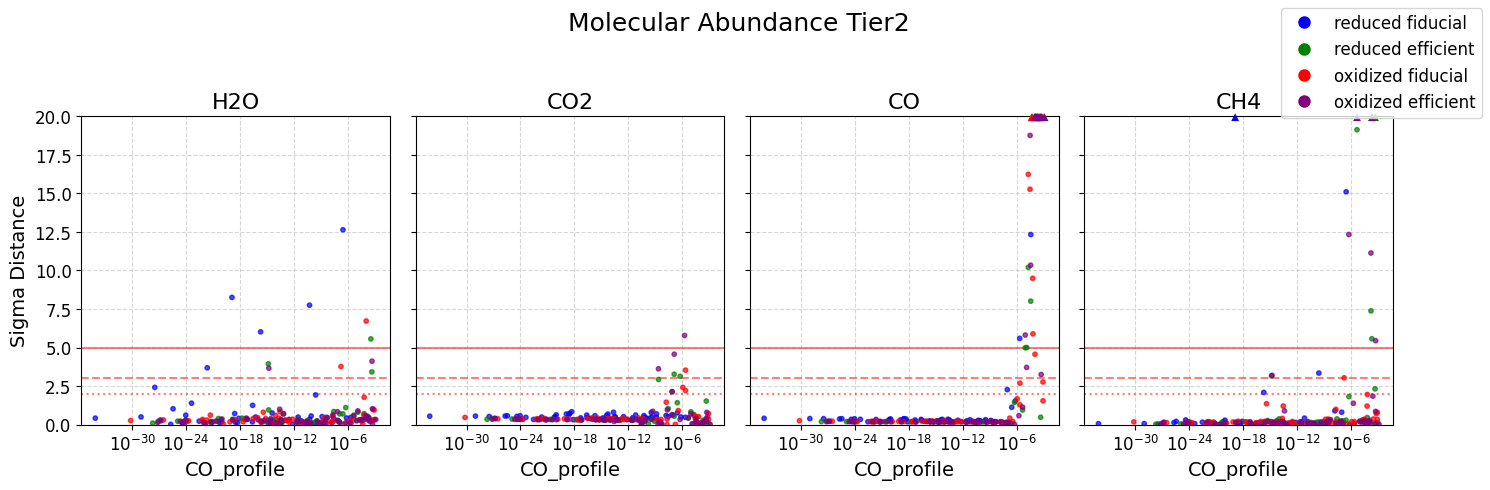

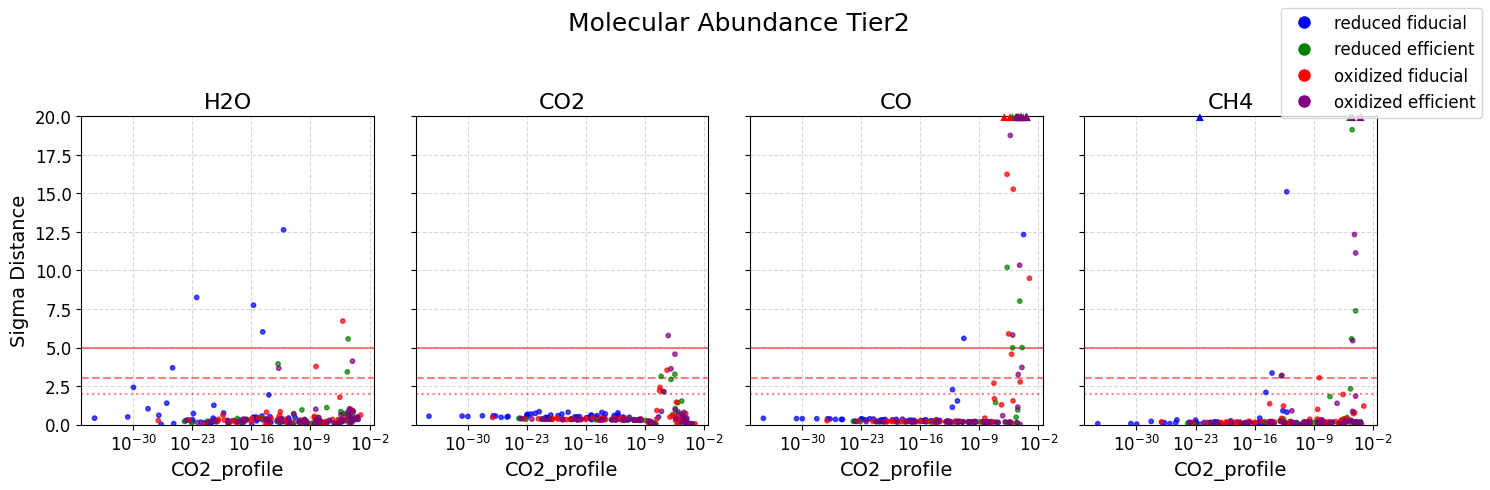

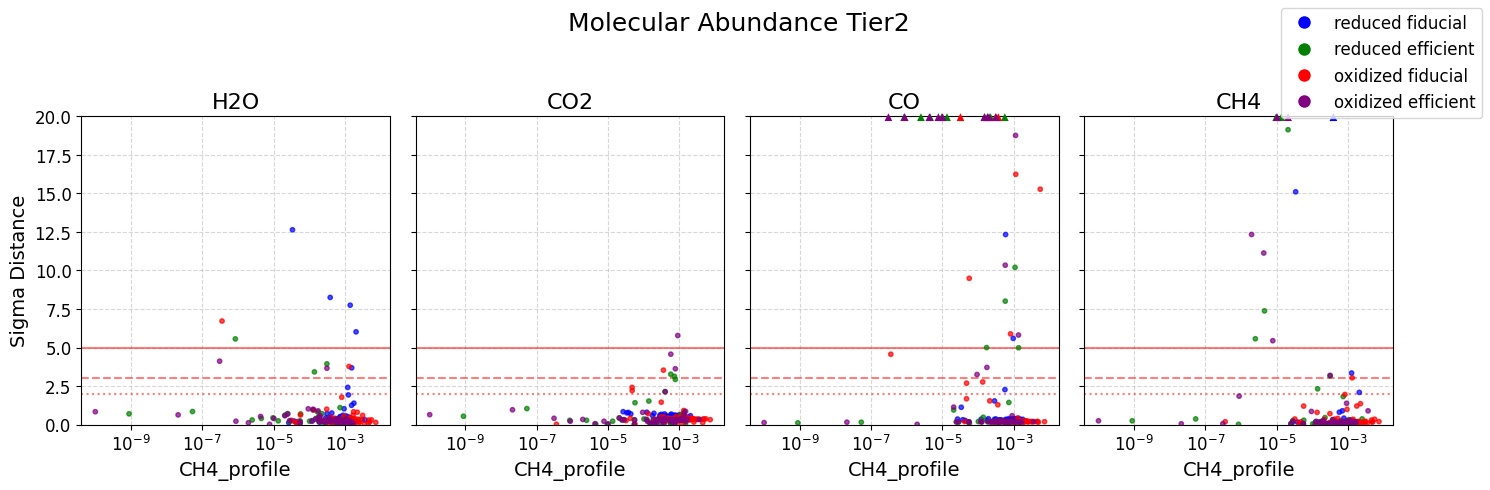

In [21]:
background_regions = [
    {"start": selections[0][0], "end": selections[0][-1], "color": "blue", "label": "reduced fiducial"},
    {"start": selections[1][0], "end": selections[1][-1], "color": "green", "label": "reduced efficient"},
    {"start": selections[2][0], "end": selections[2][-1], "color": "red", "label": "oxidized fiducial"},
    {"start": selections[3][0], "end": selections[3][-1], "color": "purple", "label": "oxidized efficient"},
]


print(inspector.out_targetlist.keys())

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="Planet Temperature [K]", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="Star Temperature [K]", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="Planet Semi-major Axis [m]", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20),  xscale="log", add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="Planet Mass [Me]", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="Accreted Ice/Rock ratio", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="H2O_profile", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), xscale="log", add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="CO_profile", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), xscale="log", add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="CO2_profile", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), xscale="log", add_annotations=False)

fig = inspector.plot_sigma_vs_input(keys=["H2O", "CO2", "CO", "CH4"], x_key="CH4_profile", title=f"Molecular Abundance {tier}", alpha=0.7, 
                                    background_regions=background_regions, ylim=(0,20), xscale="log", add_annotations=False)

# fig.savefig(f"plots/molecular_abundance_{tier}.pdf", dpi=600)



## notes

- water is failing because conditions are changed: we have priors on the water abundance up to 0.7, but inputs go up to 1.0. This is why the retrieval is failing. We need to fix this. 
- most of the O comes from water, so we need to fix this.


/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:1162: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax_scatter.scatter(


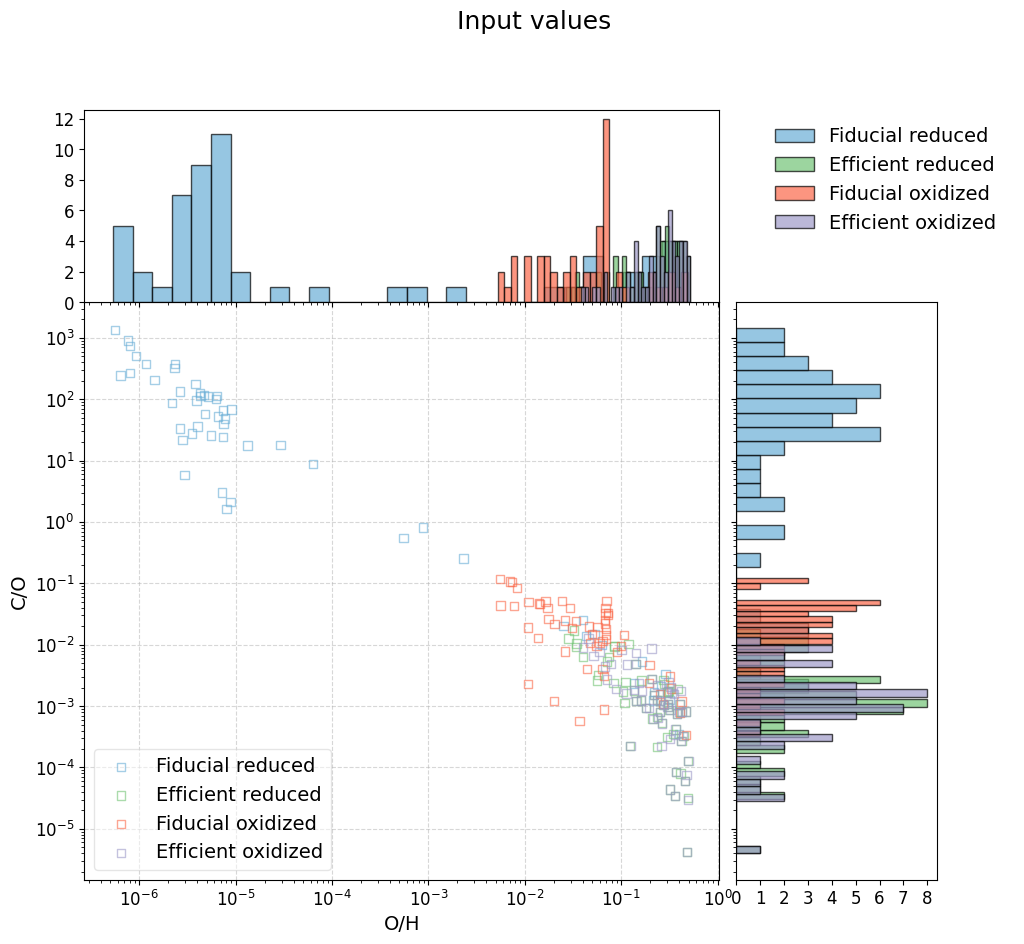

In [22]:


fig, ax_s, ax_hx, ax_hy, ax_leg, global_norm, = inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0)), 
    x_key= "OHratio", y_key="COratio",
    label="Fiducial reduced", marker="s", cmap="Blues", hist_color="#377eb8", contour_only=True,
)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0)), 
    x_key="OHratio", y_key="COratio",
    label="Efficient reduced", marker="s", cmap="Greens", hist_color="#4daf4a", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig, global_norm=global_norm
)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1)), 
    x_key="OHratio", y_key="COratio",
    label="Fiducial oxidized", marker="s", cmap="Reds", hist_color="#e41a1c", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig, global_norm=global_norm
)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1)), 
    x_key="OHratio", y_key="COratio",
    label="Efficient oxidized", marker="s", cmap="Purples", hist_color="Purple", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig, global_norm=global_norm
)

ax_s.set_xlabel("O/H")
ax_s.set_ylabel("C/O")

fig.suptitle("Input values")

fig.savefig("plots/contour_OH_COratio.pdf", dpi=600)

/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:1167: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax_scatter.scatter(
/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:1167: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax_scatter.scatter(


/export/NAS/ariel/data/lorenzo.mugnai/Alfnoor2/20250226 - NAOJ/20250520/inspector.py:1162: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax_scatter.scatter(


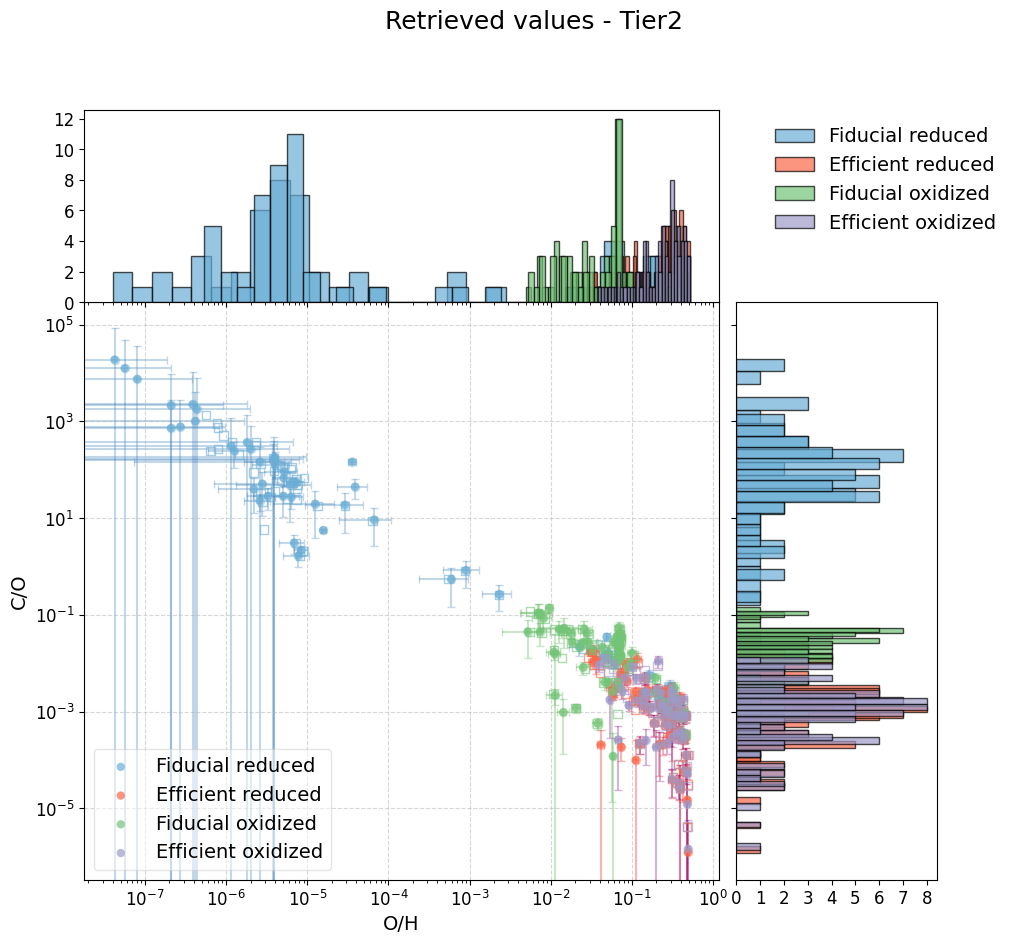

In [23]:
fig, ax_s, ax_hx, ax_hy, ax_leg, global_norm = inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0)), 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    label="Fiducial reduced", marker="o", cmap="Blues", hist_color="#377eb8", alpha=0.7,
    err_color="#377eb8", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3
)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0)), 
    x_key="OHratio", y_key="COratio", 
    label=None, marker="s", cmap="Blues", hist_color="#377eb8", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)


inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0)), 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    label="Efficient reduced", marker="o", cmap="Reds", hist_color="Red", alpha=0.7,
    err_color="Red", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==0)), 
    x_key="OHratio", y_key="COratio", 
    label=None, marker="s", cmap="Reds", hist_color="Red", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)


inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1)), 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    label="Fiducial oxidized", marker="o", cmap="Greens", hist_color="#4daf4a", alpha=0.7,
    err_color="#4daf4a", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==0) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1)), 
    x_key="OHratio", y_key="COratio", 
    label=None, marker="s", cmap="Greens", hist_color="#4daf4a", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)


inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1)), 
    x_key="O/H", y_key="C/O", 
    x_err_key="O/H_sigma", y_err_key="C/O_sigma", 
    label="Efficient oxidized", marker="o", cmap="Purples", hist_color="Purple", alpha=0.7,
    err_color="Purple", elinewidth=1.5, capsize=3, capthick=1, errorevery=1, err_alpha=0.3,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)

inspector.plot_scatter_with_histograms(
    selection = np.where((inspector.out_targetlist["Migration Efficiency [Fiducial = 0, Efficient = 1]"]==1) & (inspector.out_targetlist["Redox [Reduced = 0, Oxidized = 1]"]==1)), 
    x_key="OHratio", y_key="COratio", 
    label=None, marker="s", cmap="Purples", hist_color="Purple", contour_only=True,
    ax_scatter=ax_s, ax_hist_x=ax_hx, ax_hist_y=ax_hy, ax_legend=ax_leg, fig=fig)

fig.suptitle(f"Retrieved values - {tier}")
fig.savefig(f"plots/contour_OH_COratio_retrieved_{tier}.pdf", dpi=600)

In [24]:
summary_table = inspector.compute_differences()



100%|██████████| 59/59 [00:04<00:00, 12.59it/s]


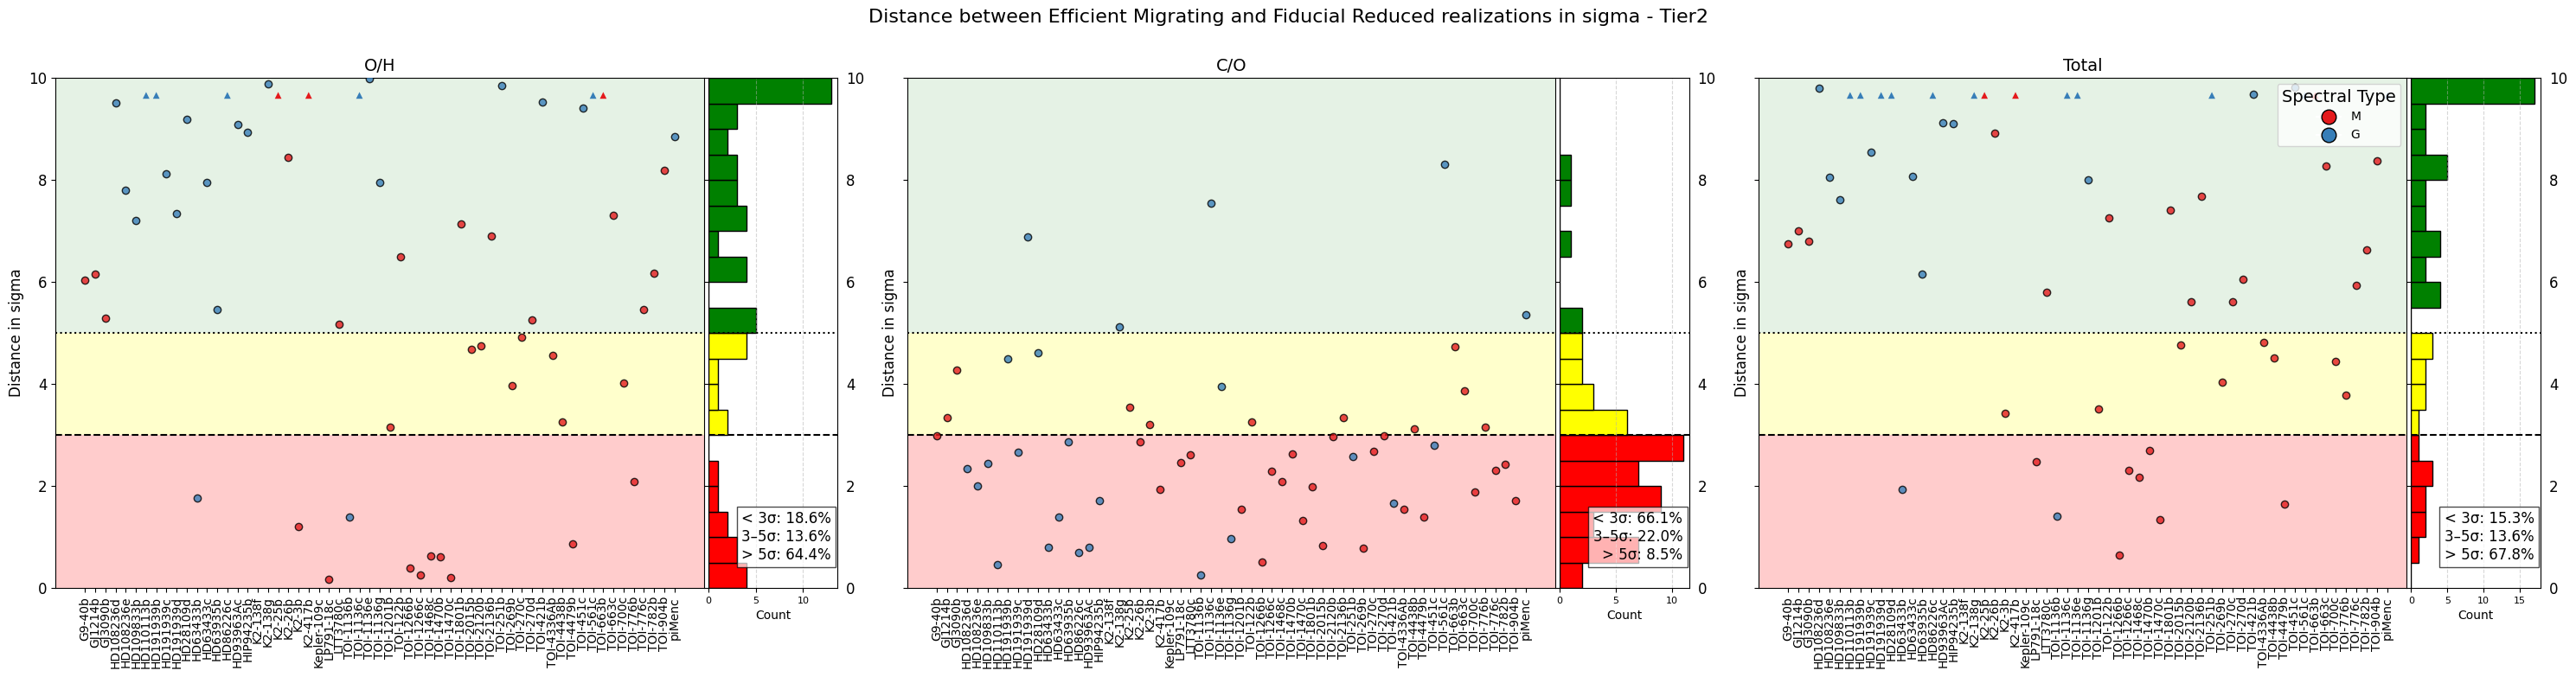

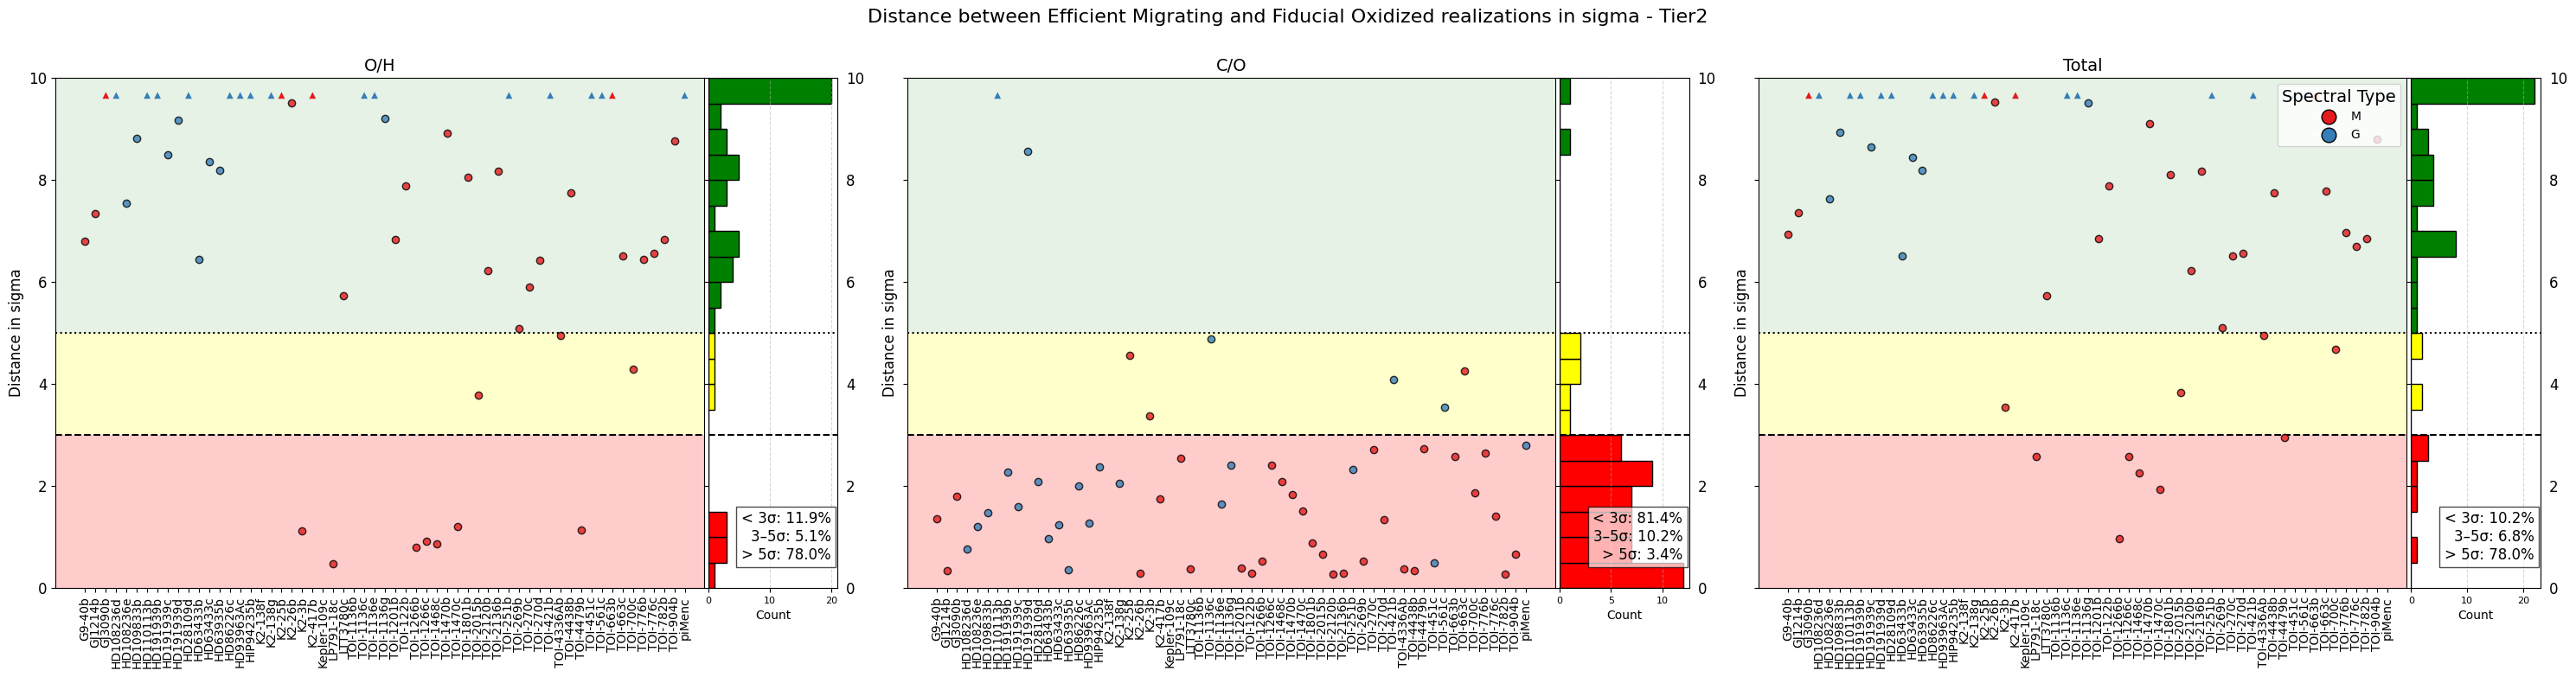

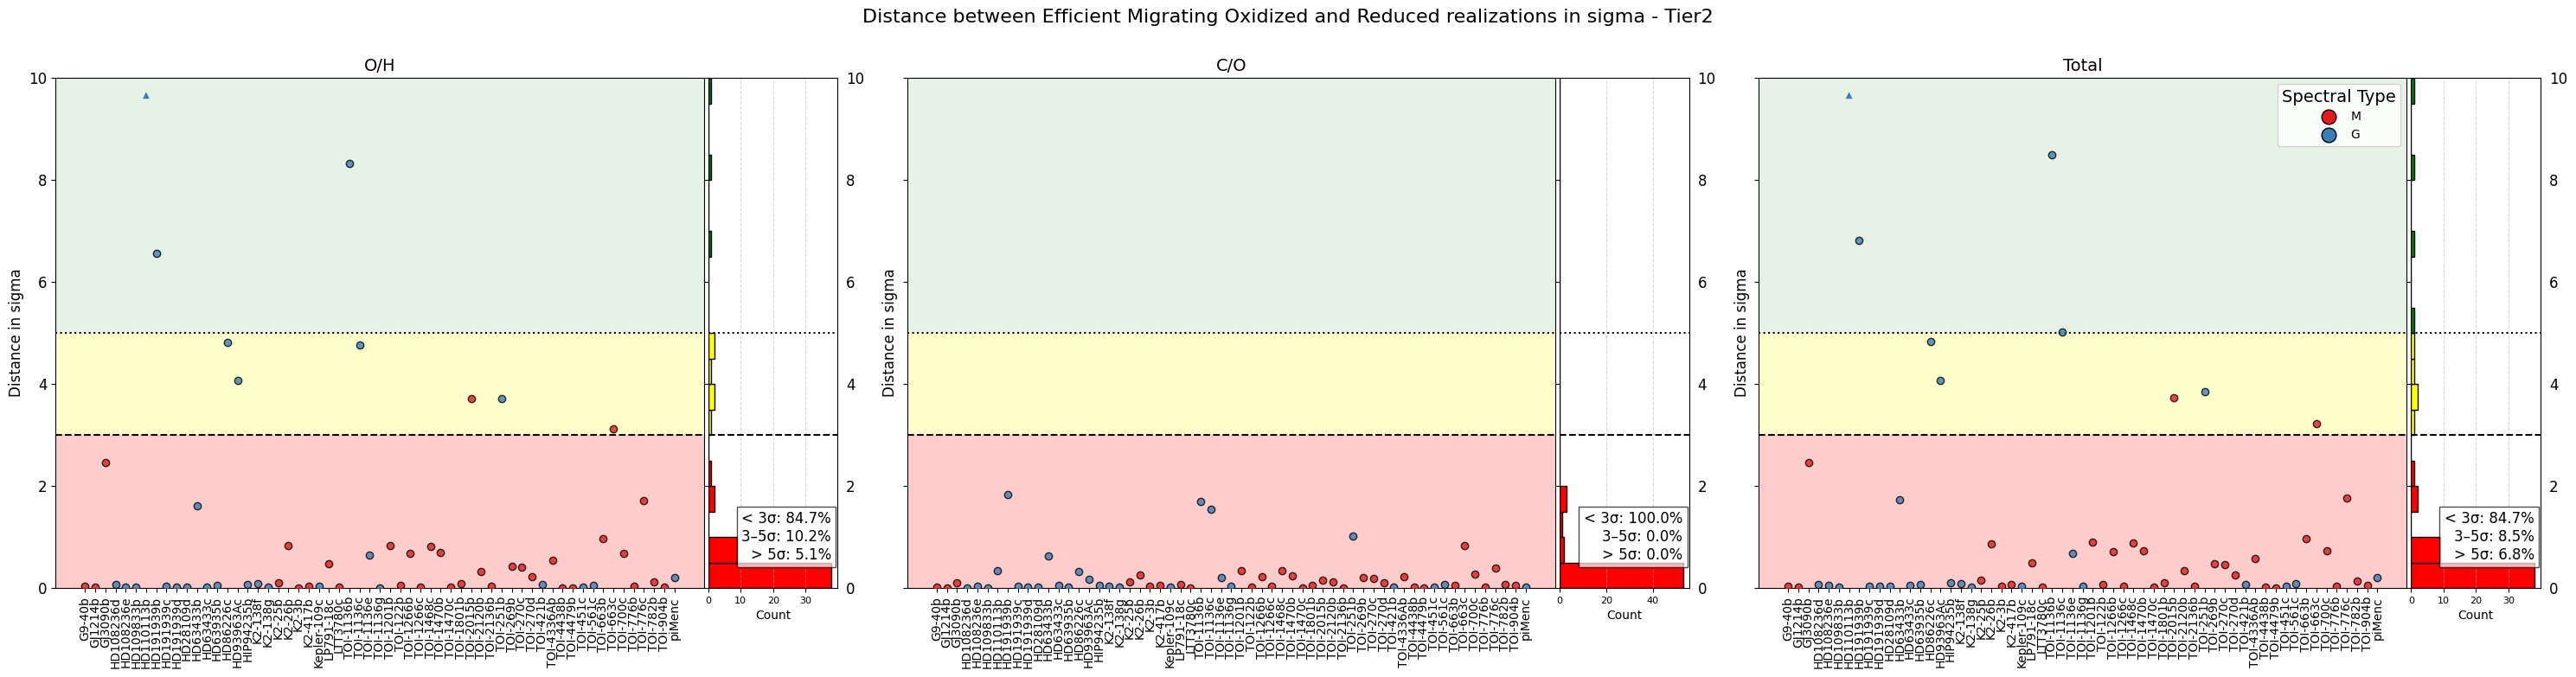

In [25]:
fig = inspector.plot_distance_panels(summary_table,  
                               param_base=["O/H", "C/O"], 
                               combo="01_vs_11",
                               title=f"Distance between Efficient Migrating and Fiducial Reduced realizations in sigma - {tier}")
fig.savefig(f"plots/distance_migrating_vs_fiducial_reduced_{tier}.pdf", dpi=600)

fig = inspector.plot_distance_panels(summary_table,  
                               param_base=["O/H", "C/O"], 
                               combo="00_vs_10",
                               title=f"Distance between Efficient Migrating and Fiducial Oxidized realizations in sigma - {tier}")
fig.savefig(f"plots/distance_migrating_vs_fiducial_oxidized_{tier}.pdf", dpi=600)

fig = inspector.plot_distance_panels(summary_table,  
                               param_base=["O/H", "C/O"], 
                               combo="10_vs_11",
                               title=f"Distance between Efficient Migrating Oxidized and Reduced realizations in sigma - {tier}")
fig.savefig(f"plots/distance_migrating_oxidized_vs_reduced_{tier}.pdf", dpi=600)